## **Análisis de la Calidad del Vino** ⛅

Descripción de las variables a usar:
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
   Output variable (based on sensory data):
12. quality (score between 0 and 10)

Enlace:
https://archive.ics.uci.edu/dataset/186/wine+quality


### **Paso 1: Importación de Datos** 🍷

In [1]:
### Importar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vino = pd.read_csv('/content/winequality-white (2).csv', sep=';')
vino.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4.5,0.19,0.21,0.95,0.033,89.0,159.0,0.99332,3.34,0.42,8.0,5.0
1,6.2,0.12,0.34,1.50,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6.0
2,6.2,0.27,0.43,7.80,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6.0
3,6.7,0.54,0.28,5.40,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5.0
4,6.1,0.27,0.43,7.50,0.049,65.0,243.0,0.99570,3.12,0.47,9.0,5.0


### **Paso 2: Revisión de datos NAN** 🍷

In [2]:
##Revisar si existe inconsistencia en los datos
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4897 non-null   float64
 2   citric acid           4897 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4897 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4897 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4897 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4897 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [3]:
vino.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.200000
volatile acidity,4897.0,0.278253,0.100801,0.08000,0.210000,0.26000,0.3200,1.100000
citric acid,4897.0,0.334231,0.121000,0.00000,0.270000,0.32000,0.3900,1.660000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.800000
chlorides,4897.0,0.045773,0.021850,0.00900,0.036000,0.04300,0.0500,0.346000
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.000000
total sulfur dioxide,4897.0,138.366040,42.500734,9.00000,108.000000,134.00000,167.0000,440.000000
density,4898.0,1.548363,6.838541,0.98711,0.991723,0.99374,0.9961,103.898000
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.820000
sulphates,4897.0,0.489873,0.114122,0.22000,0.410000,0.47000,0.5500,1.080000


### **Paso 3: Limpieza de datos NAN** 🍷

In [4]:
##Limpiar con media o mediana los datos NAN
##Función para detectar datos inconsistentes NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%50s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%50s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

datos_NAN(vino)

Dimensiones: 4898 filas, 12 columnas
Total valores NAN: 6
                                    Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                     fixed acidity    float64          68          0
                                  volatile acidity    float64         125          1
                                       citric acid    float64          87          1
                                    residual sugar    float64         310          0
                                         chlorides    float64         160          1
                               free sulfur dioxide    float64         132          0
                              total sulfur dioxide    float64         251          1
                                           density    float64         890          0
                                                pH    float64         103          0
                                         sulphates    float64          79          1

<ipython-input-4-08a28ff7c0c3>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%50s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


<Axes: >

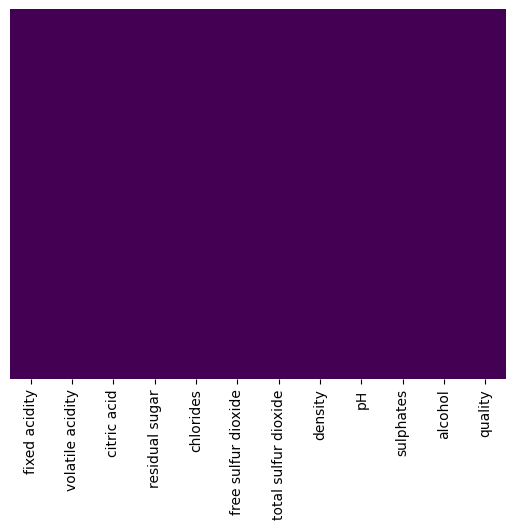

In [5]:
sns.heatmap(vino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### **Paso 4: Realizar 5 gráficas exploratorias** 🍷

In [6]:
variables = vino.columns
variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

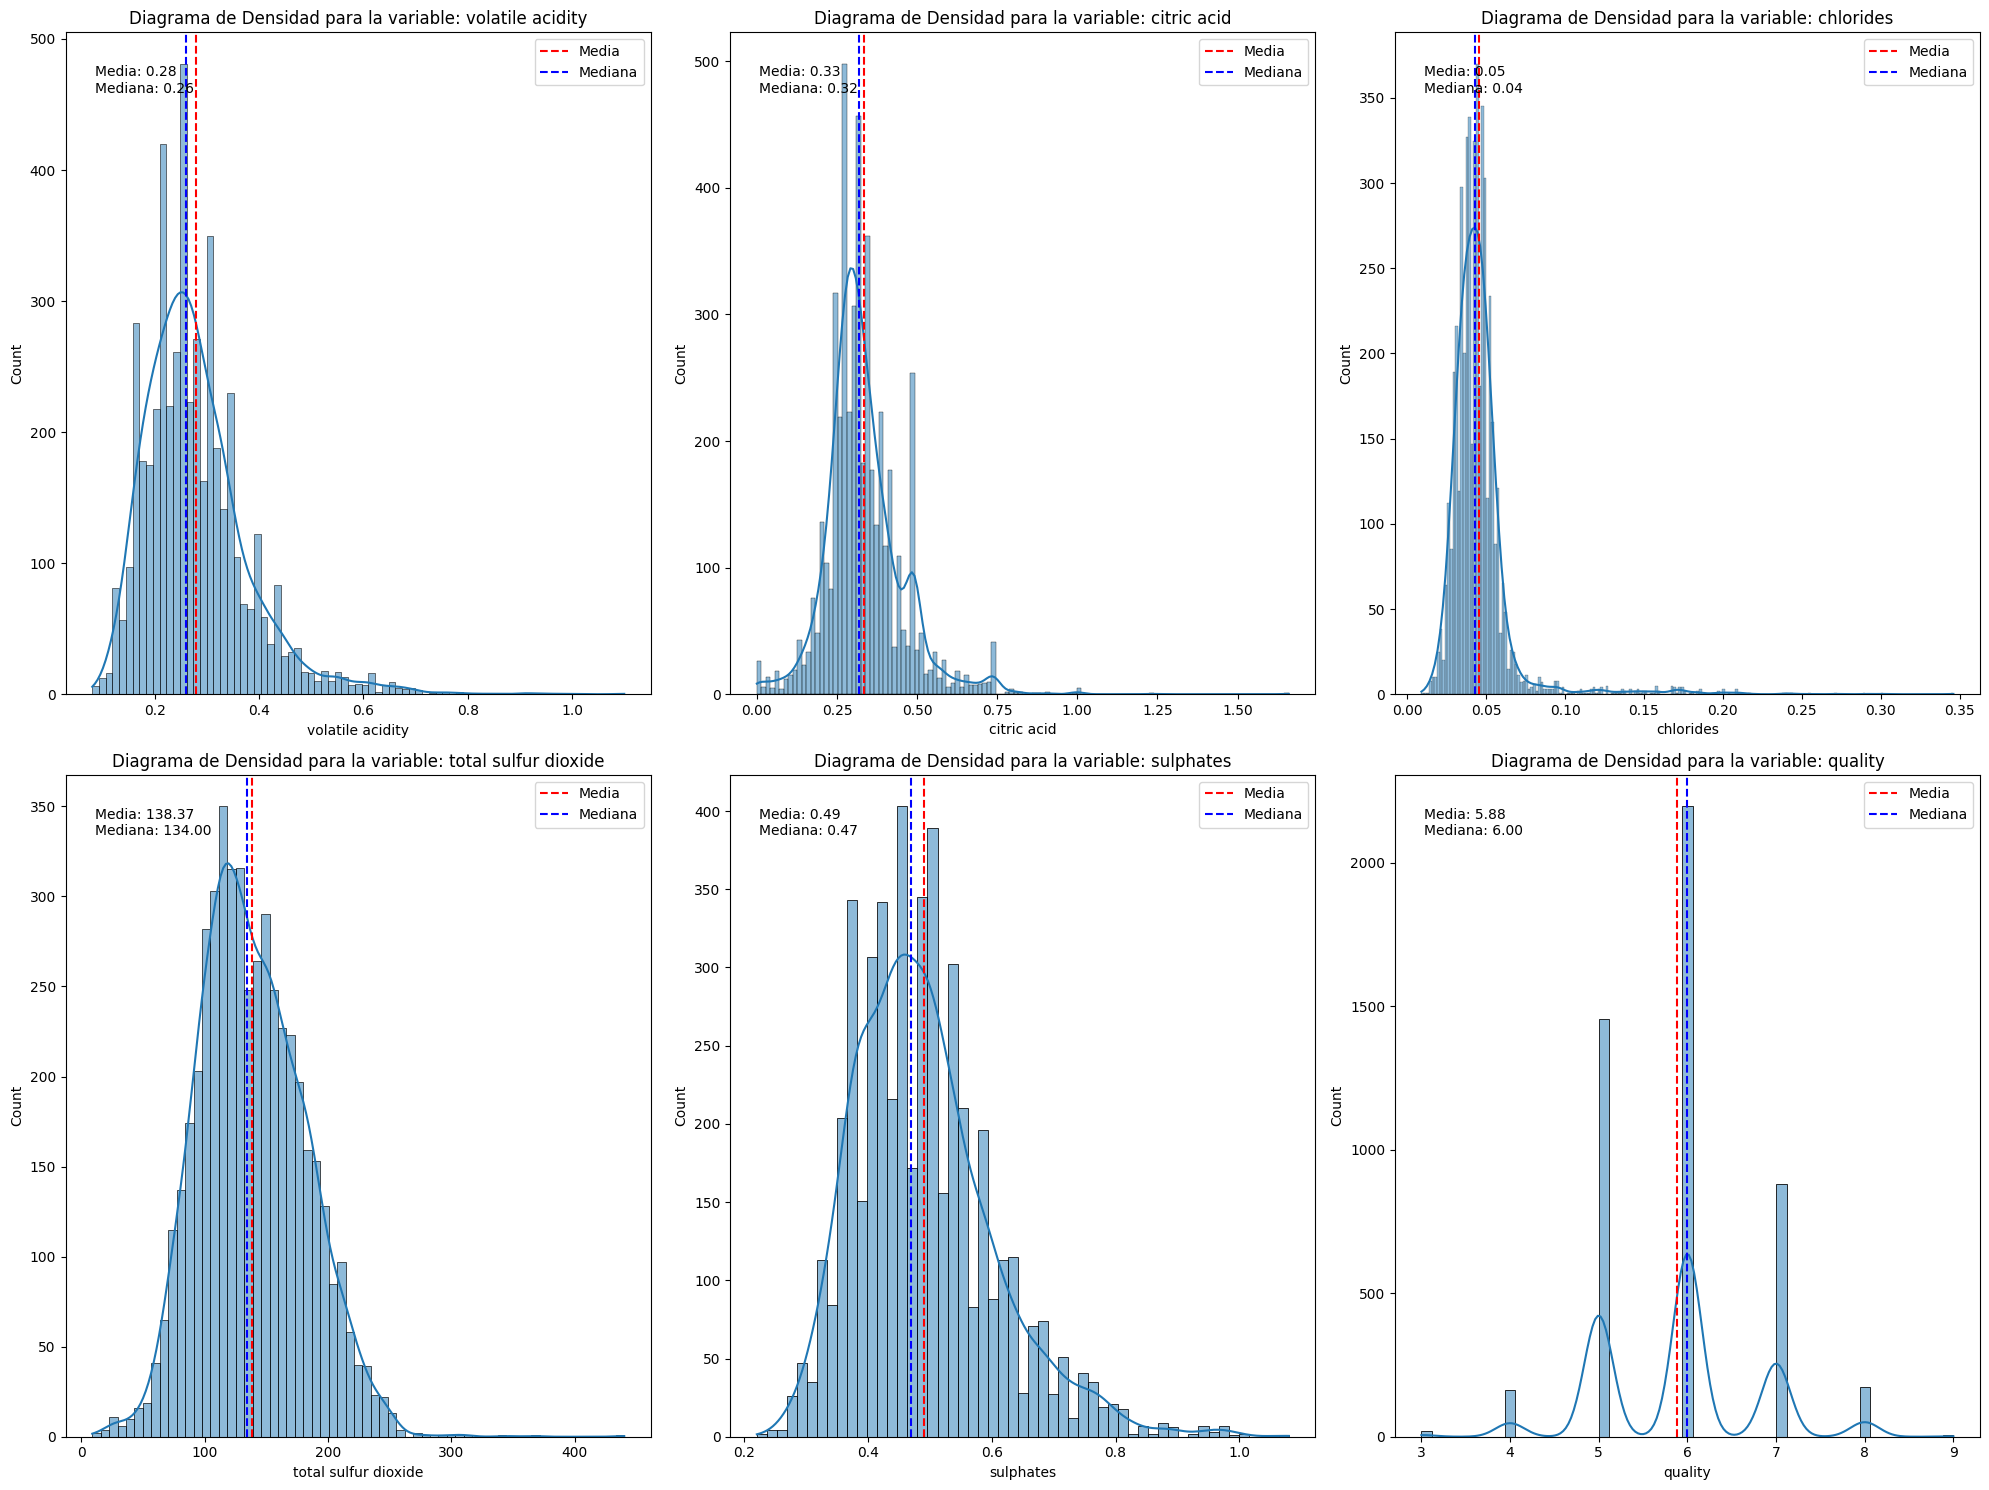

In [7]:
##realizar gráficas de apoyo para definir pregunta de investigación - Generar observaciones

variables = [ 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'quality']

fig, axes = plt.subplots(2,3, figsize=(20,15))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(vino[var], kde=True, ax=ax)
  ax.axvline(vino[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(vino[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {vino[var].mean():.2f}\nMediana: {vino[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()

In [8]:
vino['quality'].describe().T

,quality
count,4897.000000
mean,5.877884
std,0.885727
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


Text(0, 0.5, 'Acidez Fija')

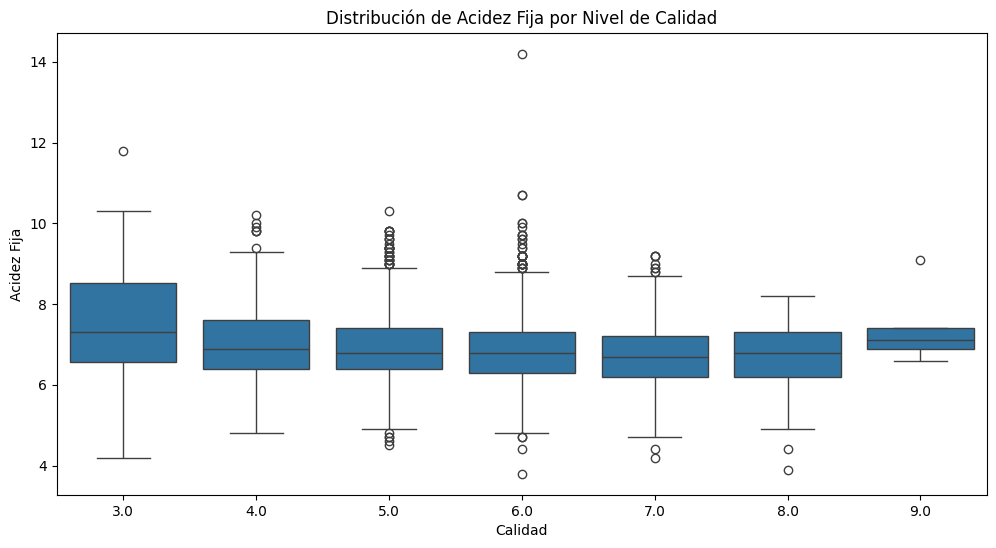

In [9]:
##realizar 5 graficas con las variables de vino usando seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=vino, x='quality', y='fixed acidity')
plt.title('Distribución de Acidez Fija por Nivel de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Acidez Fija')

Text(0, 0.5, 'Azucar Residual')

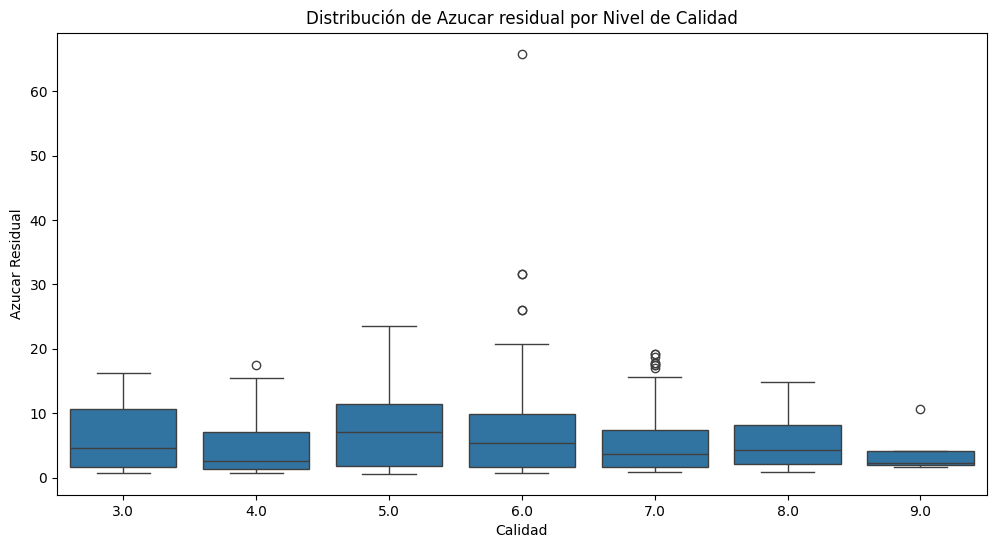

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vino, x='quality', y='residual sugar')
plt.title('Distribución de Azucar residual por Nivel de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Azucar Residual')

Text(0, 0.5, 'Frecuencia')

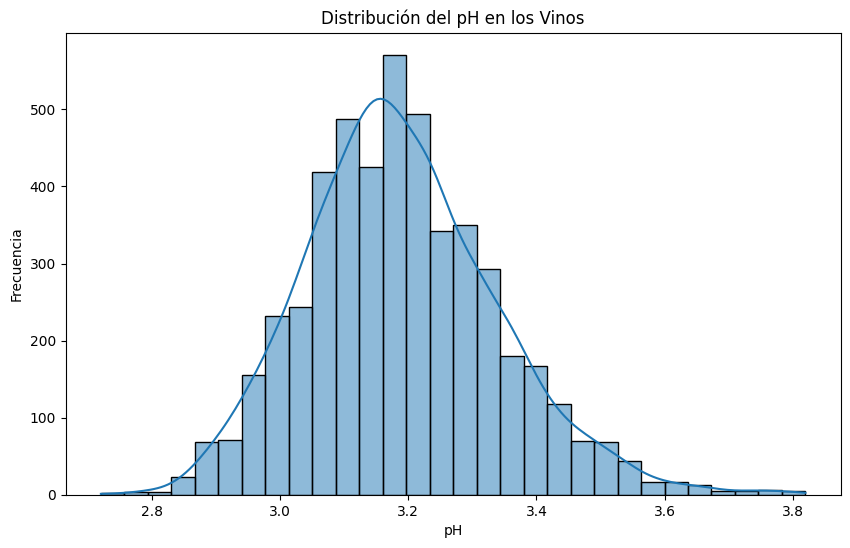

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vino, x='pH', bins=30, kde=True)
plt.title('Distribución del pH en los Vinos')
plt.xlabel('pH')
plt.ylabel('Frecuencia')


### **4.1. Revisión Ruido**

In [12]:
###Limpiar datos NAN
variables = [ 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'quality']

vino['volatile acidity']= vino['volatile acidity'].fillna(vino['volatile acidity'].median())
vino['quality']= vino['quality'].fillna(vino['quality'].mean())
vino['citric acid']= vino['citric acid'].fillna(vino['citric acid'].median())
vino['chlorides']= vino['chlorides'].fillna(vino['chlorides'].median())
vino['total sulfur dioxide']= vino['total sulfur dioxide'].fillna(vino['total sulfur dioxide'].median())
vino['sulphates']= vino['sulphates'].fillna(vino['sulphates'].median())


In [13]:
for k,v in vino.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(vino)[0]
  print('columna %s ruido= %s' % (k, porc))

columna fixed acidity ruido= 0.029808084932625562
columna volatile acidity ruido= 0.0379746835443038
columna citric acid ruido= 0.05512454062882809
columna residual sugar ruido= 0.0014291547570436914
columna chlorides ruido= 0.04246631278072683
columna free sulfur dioxide ruido= 0.010208248264597795
columna total sulfur dioxide ruido= 0.0038791343405471623
columna density ruido= 0.014495712535728868
columna pH ruido= 0.015312372396896692
columna sulphates ruido= 0.02531645569620253
columna alcohol ruido= 0.006941608819926501
columna quality ruido= 0.04083299305839118


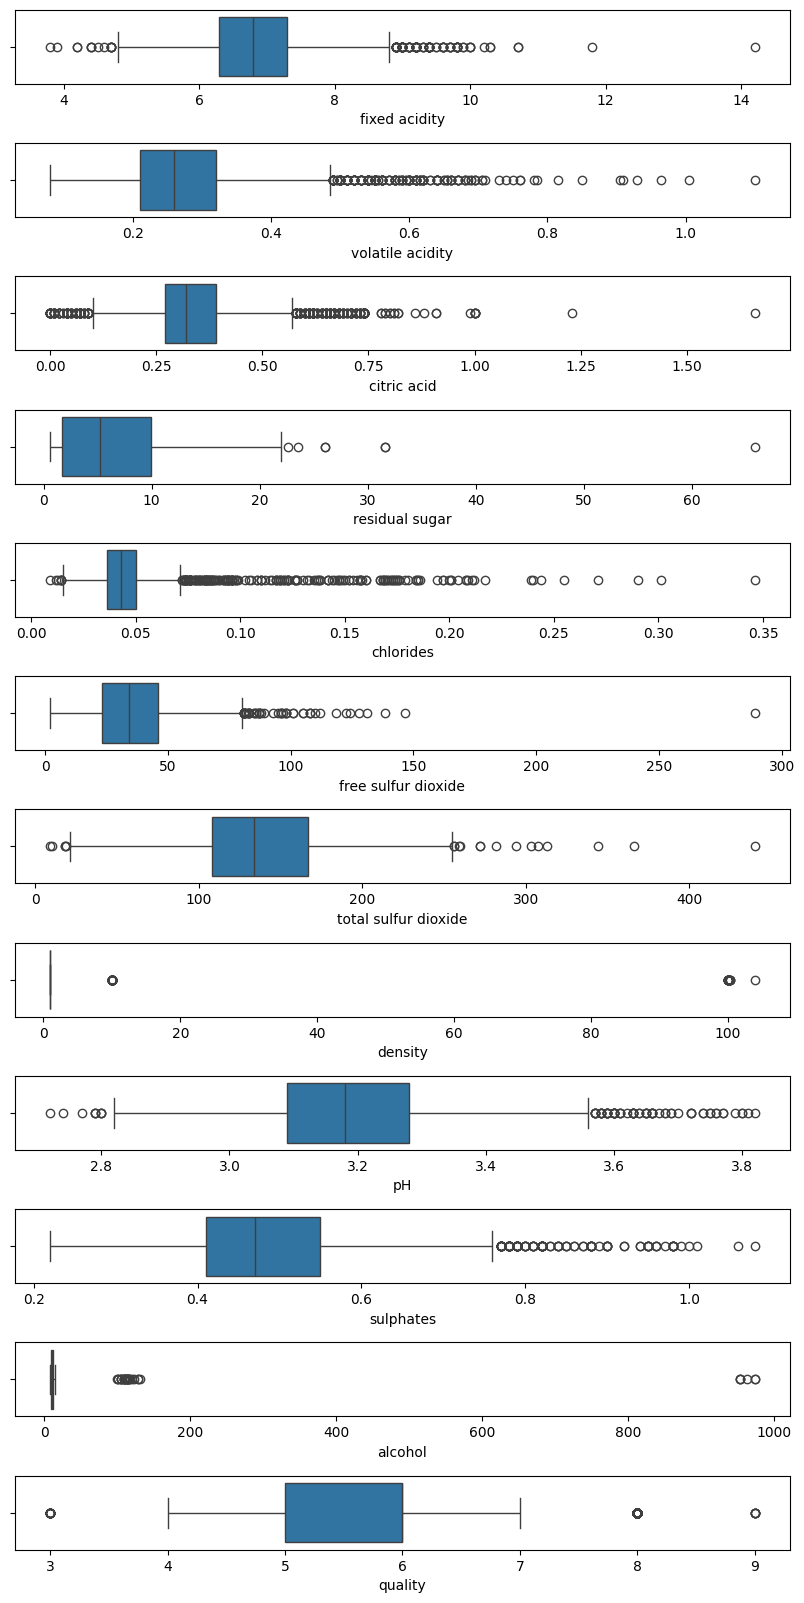

In [14]:
##revisión previa
columnas = vino.columns

fig, ax = plt.subplots(12,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(12):
  sns.boxplot(x=columnas[i], data=vino , ax=ax[i])

In [15]:
# Reemplazo de outliers por la mediana
df_vino = vino.copy()

# Definimos el umbral de outliers como aquellos valores fuera de 1.5 desviaciones estándar
for col in df_vino .columns:
    mean = df_vino [col].mean()
    std = df_vino [col].std()
    outliers = (df_vino [col] < mean - 1.5 * std) | (df_vino [col] > mean + 1.5 * std)
    df_vino.loc[outliers, col] = df_vino[col].median()

In [16]:
for k,v in df_vino.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(df_vino)[0]
  print('columna %s ruido= %s' % (k, porc))

columna fixed acidity ruido= 0.0
columna volatile acidity ruido= 0.0
columna citric acid ruido= 0.012249897917517355
columna residual sugar ruido= 0.0
columna chlorides ruido= 0.014699877501020826
columna free sulfur dioxide ruido= 0.0
columna total sulfur dioxide ruido= 0.0
columna density ruido= 0.009799918334013884
columna pH ruido= 0.0
columna sulphates ruido= 0.0
columna alcohol ruido= 0.0
columna quality ruido= 0.0


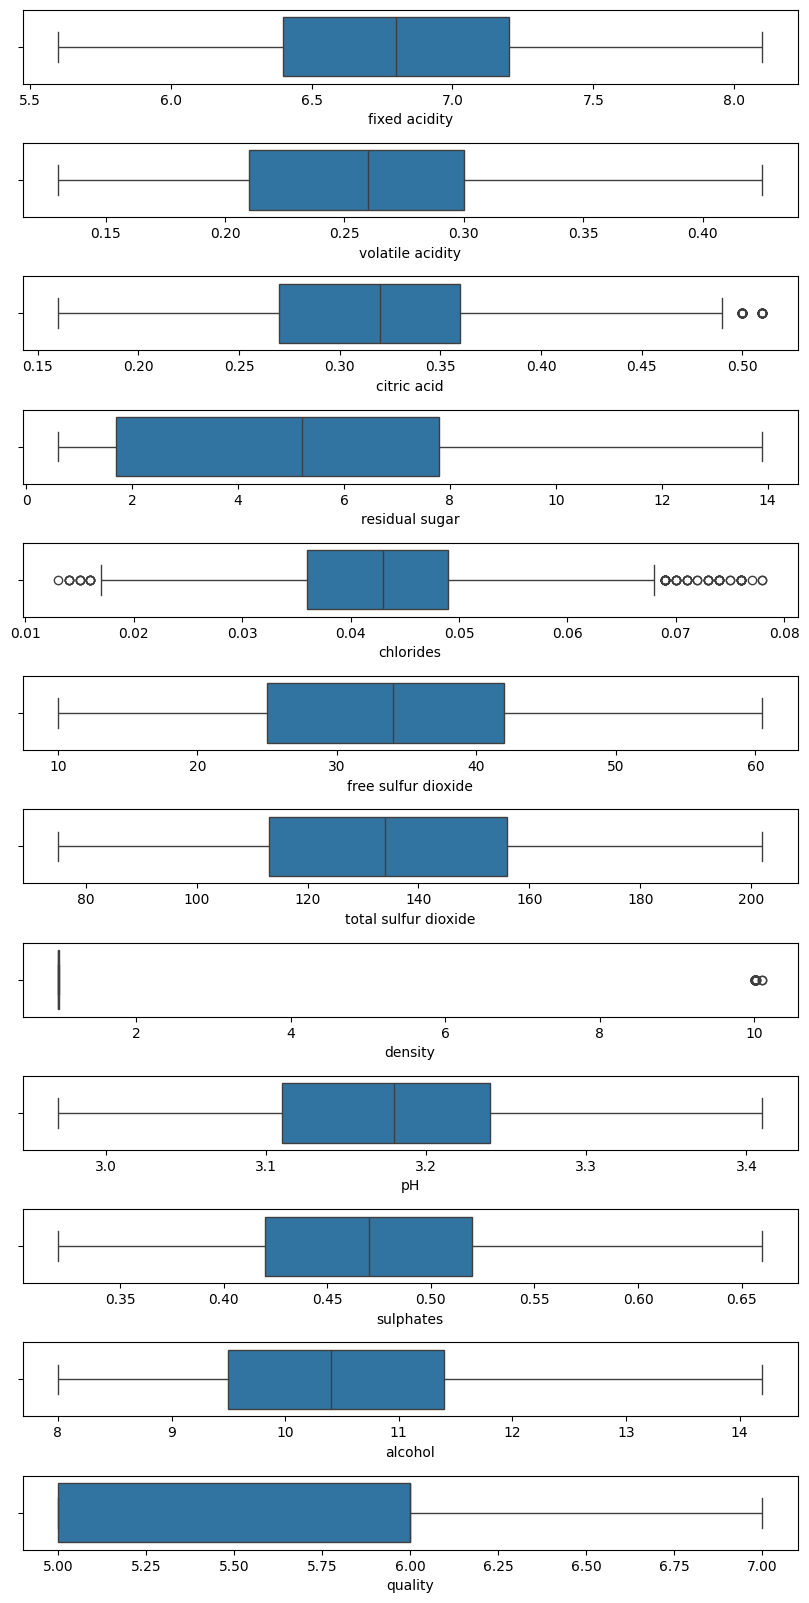

In [17]:
##revisión previa
columnas = df_vino.columns

fig, ax = plt.subplots(12,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(12):
  sns.boxplot(x=columnas[i], data=df_vino , ax=ax[i])

In [18]:
vino.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.200000
volatile acidity,4898.0,0.278249,0.100791,0.08000,0.210000,0.26000,0.3200,1.100000
citric acid,4898.0,0.334228,0.120988,0.00000,0.270000,0.32000,0.3900,1.660000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.800000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.346000
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.000000
total sulfur dioxide,4898.0,138.365149,42.496440,9.00000,108.000000,134.00000,167.0000,440.000000
density,4898.0,1.548363,6.838541,0.98711,0.991723,0.99374,0.9961,103.898000
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.820000
sulphates,4898.0,0.489869,0.114111,0.22000,0.410000,0.47000,0.5500,1.080000


### **Paso 5: Normalizar los datos** 🍷

In [19]:
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

df_vinonorm = normaData(df_vino)

df_vinonorm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,0.474369,0.229007,0.0,0.320000,0.480000,0.640000,1.0
volatile acidity,4898.0,0.442903,0.219747,0.0,0.271186,0.440678,0.576271,1.0
citric acid,4898.0,0.468302,0.216039,0.0,0.314286,0.457143,0.571429,1.0
residual sugar,4898.0,0.350745,0.277138,0.0,0.082707,0.345865,0.541353,1.0
chlorides,4898.0,0.454751,0.154761,0.0,0.353846,0.461538,0.553846,1.0
free sulfur dioxide,4898.0,0.467548,0.237748,0.0,0.297030,0.475248,0.633663,1.0
total sulfur dioxide,4898.0,0.474864,0.238502,0.0,0.299213,0.464567,0.637795,1.0
density,4898.0,0.010438,0.097430,0.0,0.000506,0.000727,0.000980,1.0
pH,4898.0,0.476656,0.228406,0.0,0.318182,0.477273,0.613636,1.0
sulphates,4898.0,0.447590,0.227090,0.0,0.294118,0.441176,0.588235,1.0


In [20]:
df_vinonormini = normaData(vino)

### **Paso 6: Test de Normalidad** 🍷

In [21]:
##Aplicar el test de normalidad shapiro - wilk - Generar Observaciones
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(df_vinonorm)

,Variable,Valores P,Concepto
0,fixed acidity,2.925795e-23,No es una variable Normal
1,volatile acidity,3.923448e-24,No es una variable Normal
2,citric acid,2.417443e-32,No es una variable Normal
3,residual sugar,1.239627e-47,No es una variable Normal
4,chlorides,1.206360e-11,No es una variable Normal
5,free sulfur dioxide,1.091492e-24,No es una variable Normal
6,total sulfur dioxide,7.564561e-26,No es una variable Normal
7,density,1.550707e-93,No es una variable Normal
8,pH,2.632017e-24,No es una variable Normal
9,sulphates,1.101578e-24,No es una variable Normal


In [22]:
testShapiroWilk(df_vinonormini)

,Variable,Valores P,Concepto
0,fixed acidity,1.150152e-27,No es una variable Normal
1,volatile acidity,4.607349e-48,No es una variable Normal
2,citric acid,9.548285e-45,No es una variable Normal
3,residual sugar,2.820712e-51,No es una variable Normal
4,chlorides,2.139437e-75,No es una variable Normal
5,free sulfur dioxide,3.857850e-40,No es una variable Normal
6,total sulfur dioxide,4.562011e-19,No es una variable Normal
7,density,5.016601e-94,No es una variable Normal
8,pH,6.505519e-20,No es una variable Normal
9,sulphates,1.826780e-37,No es una variable Normal


### **Paso 7: Correlación** 🍷

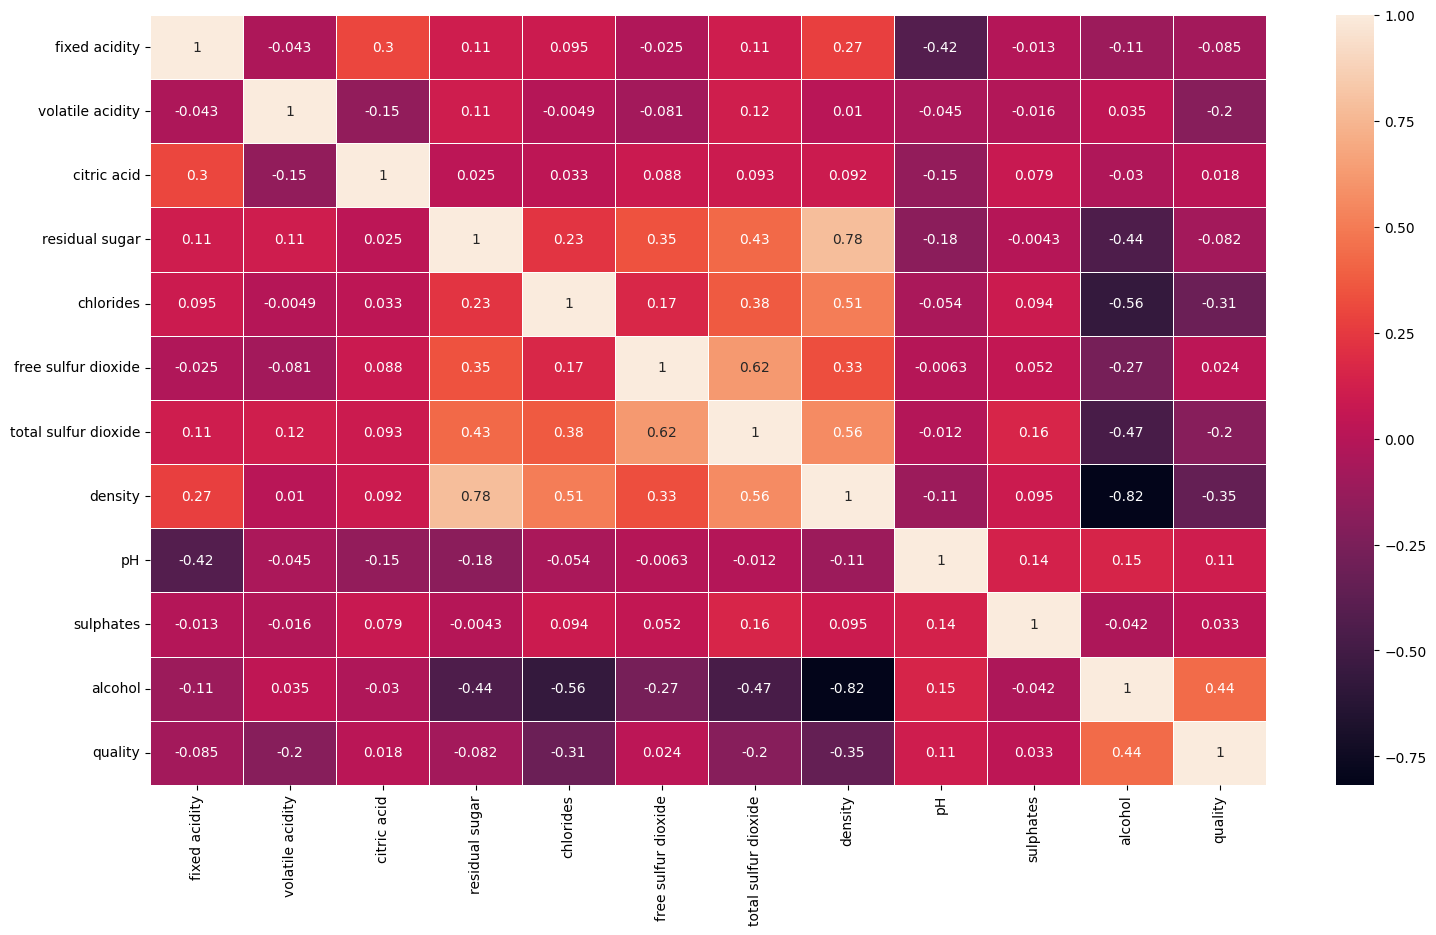

In [23]:
###Realizar las correlaciones necesarias y analizarlas - correlación de vino sin limpieza de ruido
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(df_vinonormini, 18,10)

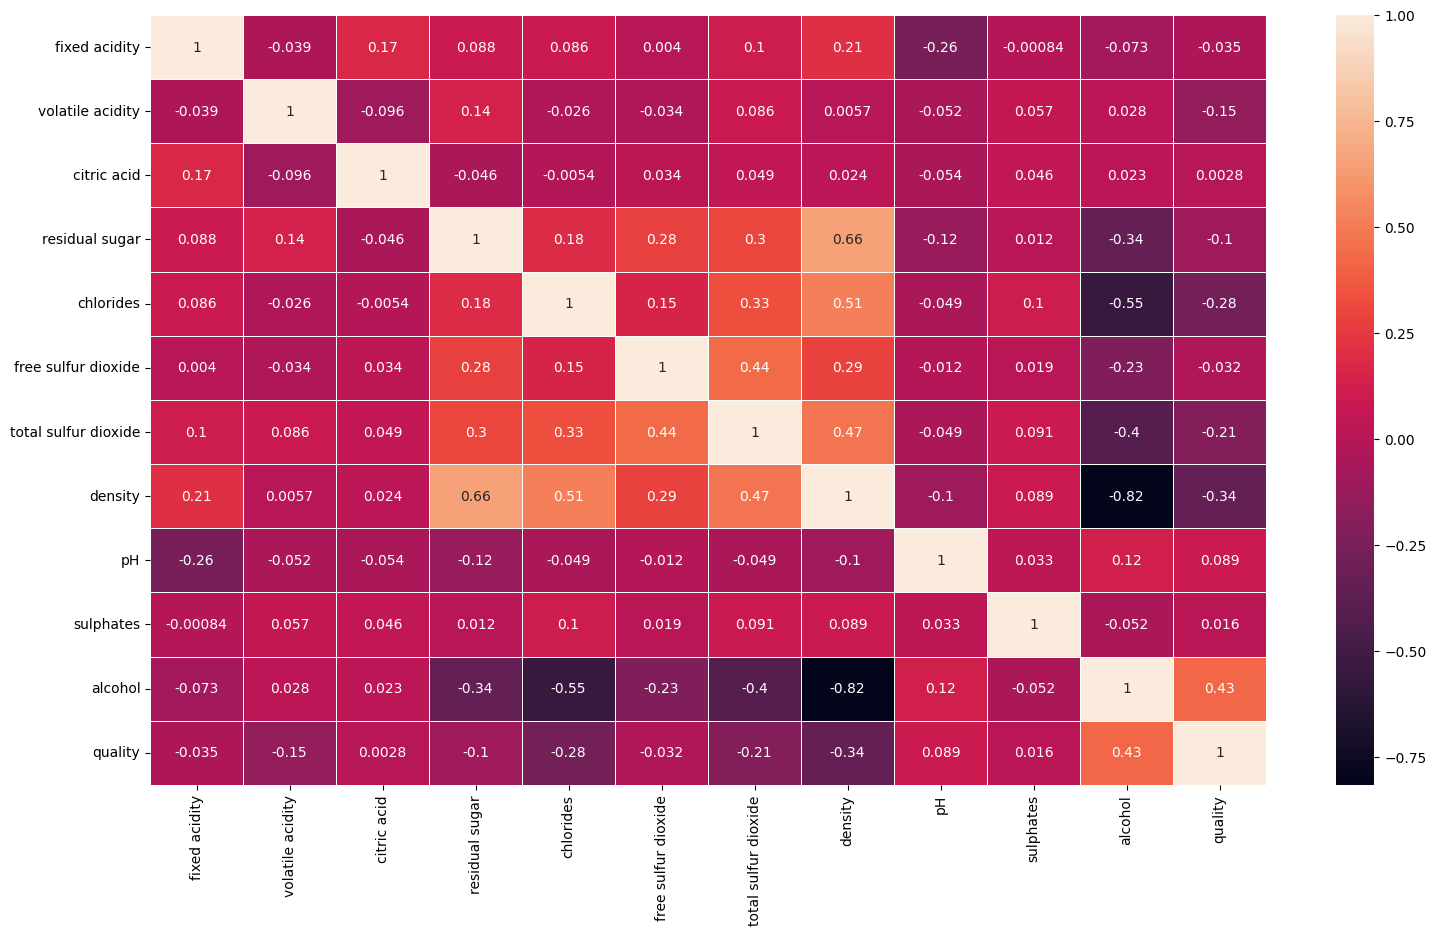

In [24]:
DiagCorr(df_vinonorm, 18,10)

### **Paso 8: Estudiar la Heteroscedasticidad** 🍷

In [25]:
##Extraer columnas
columnas = df_vinonormini.columns
columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
##Aplicar el test de breuch pagan para verificar la heteroscedasticidad - solucionar en caso de presentar

import statsmodels.api as sm

# Definir las variables independientes y la variable dependiente
X = df_vinonormini[[
         'fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality' ]]

y = df_vinonormini['residual sugar']

# Añadir una constante a las variables independientes para el intercepto
X_with_const = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X_with_const).fit(cov_type='HC3')

# Obtener los valores ajustados (predicciones) y los residuos
fitted_vals = model.fittedvalues
residuals = model.resid

# Mostrar el resumen del modelo (opcional)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         residual sugar   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          9.79e-261
Time:                        15:39:39   Log-Likelihood:                 6237.1
No. Observations:                4898   AIC:                        -1.245e+04
Df Residuals:                    4886   BIC:                        -1.237e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0578 

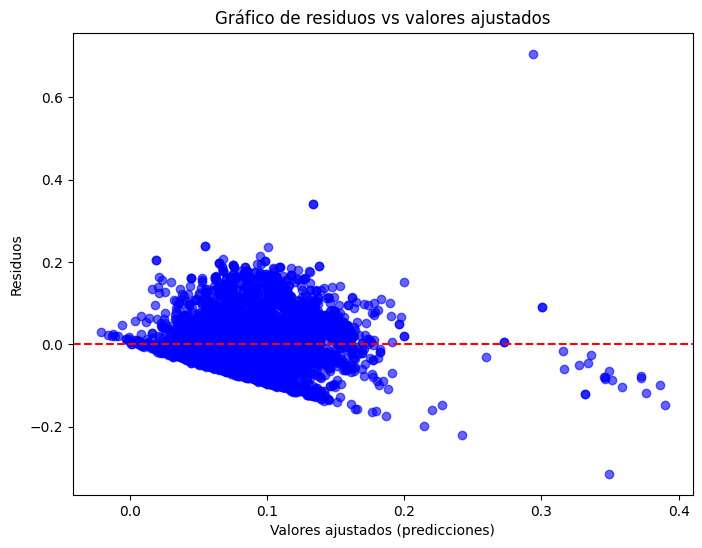

In [27]:
# Gráfico de residuos vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos vs valores ajustados')
plt.xlabel('Valores ajustados (predicciones)')
plt.ylabel('Residuos')
plt.show()

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de Breusch-Pagan para homocedasticidad
test_results = het_breuschpagan(residuals, X_with_const)

# El resultado devuelve cuatro valores: Lagrange multiplier statistic, p-value, f-value, f p-value
labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test_results)))

{'Lagrange Multiplier Statistic': 240.30969280502165, 'p-value': 2.9773247826139984e-45, 'f-value': 22.917194840532876, 'f p-value': 1.896491226533846e-46}


In [29]:
### Aplicarle al dataframe raiz cuadrada - Vuelven a realizar el método de breushcpagan

### **Paso 9: Estudiar la Multicolinealidad** 🍷

In [30]:
##Aplicar el test de VIF para revisar la existencia de multicolinealidad - solucionar en caso de presentar
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns

# El VIF se calcula usando el variance_inflation_factor de statsmodels
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Mostrar los resultados de VIF
print(vif_data)

                Variable        VIF
0                  const  80.284093
1          fixed acidity   1.362068
2       volatile acidity   1.110004
3            citric acid   1.153625
4              chlorides   1.098216
5    free sulfur dioxide   1.743713
6   total sulfur dioxide   1.870962
7                density   1.017068
8                     pH   1.285145
9              sulphates   1.059593
10               alcohol   1.003040
11               quality   1.134184


In [31]:
##Aplicar logaritmo natural a las variables que tengan el valor del VIF sobre 5, raiz cuadrada., sacar la variable.

### **Paso 10: Definir pregunta de Investigación para Regresión** 🍷

In [32]:
###establecer una pregunta de investigación puntual para regresión
#¿Cuál es la correlacion entre la densidad y el azucar residual dentro de los vinos?

#¿Cuál es la predicción del modelo lineal para estas dos variables y cuales son las variables mas importantes?


### **Paso 11: Primer Modelo Regresión Múltiple 60% entrenamiento y 40% testeo** 🍷

In [33]:
##Crear el primer modelo y gráficarlo generar conclusiones.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables
##Variable independiente
X = df_vinonormini[[
         'fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality' ]]
##variable a predecir o dependiente
y = df_vinonormini['residual sugar']

##Particionar los datos -siempre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.0050654712170308674
Root Mean Squared Error (RMSE) 0.07117212387607151
R^2 Score: 0.152


### **Paso 12: Segundo Modelo Regresión Múltiple 70% entrenamiento y 30% testeo** 🍷

In [34]:
##Crear el segundo modelo y gráficarlo generar conclusiones.
##Crear el primer modelo y gráficarlo generar conclusiones.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables
##Variable independiente
X = df_vinonormini[[
         'fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality' ]]
##variable a predecir o dependiente
y = df_vinonormini['residual sugar']

##Particionar los datos -siempre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

##crear el modelo
modelodos = LinearRegression()
modelodos.fit(X_train, y_train)

##Predicciones
y_pred = modelodos.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.0047216551273577675
Root Mean Squared Error (RMSE) 0.06871430074851789
R^2 Score: 0.23


### **Paso 13: Tercer Modelo Regresión Múltiple 80% entrenamiento y 20% testeo** 🍷

In [35]:
##Crear el tercer modelo y gráficarlo generar conclusiones.
##Crear el segundo modelo y gráficarlo generar conclusiones.
##Crear el primer modelo y gráficarlo generar conclusiones.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables
##Variable independiente
X = df_vinonormini[[
          'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH' ]]
##variable a predecir o dependiente
y = df_vinonormini['residual sugar']

##Particionar los datos -siempre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

##crear el modelo
modelotres = LinearRegression()
modelotres.fit(X_train, y_train)

##Predicciones
y_pred = modelotres.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.004646269802329151
Root Mean Squared Error (RMSE) 0.06816355186116074
R^2 Score: 0.223


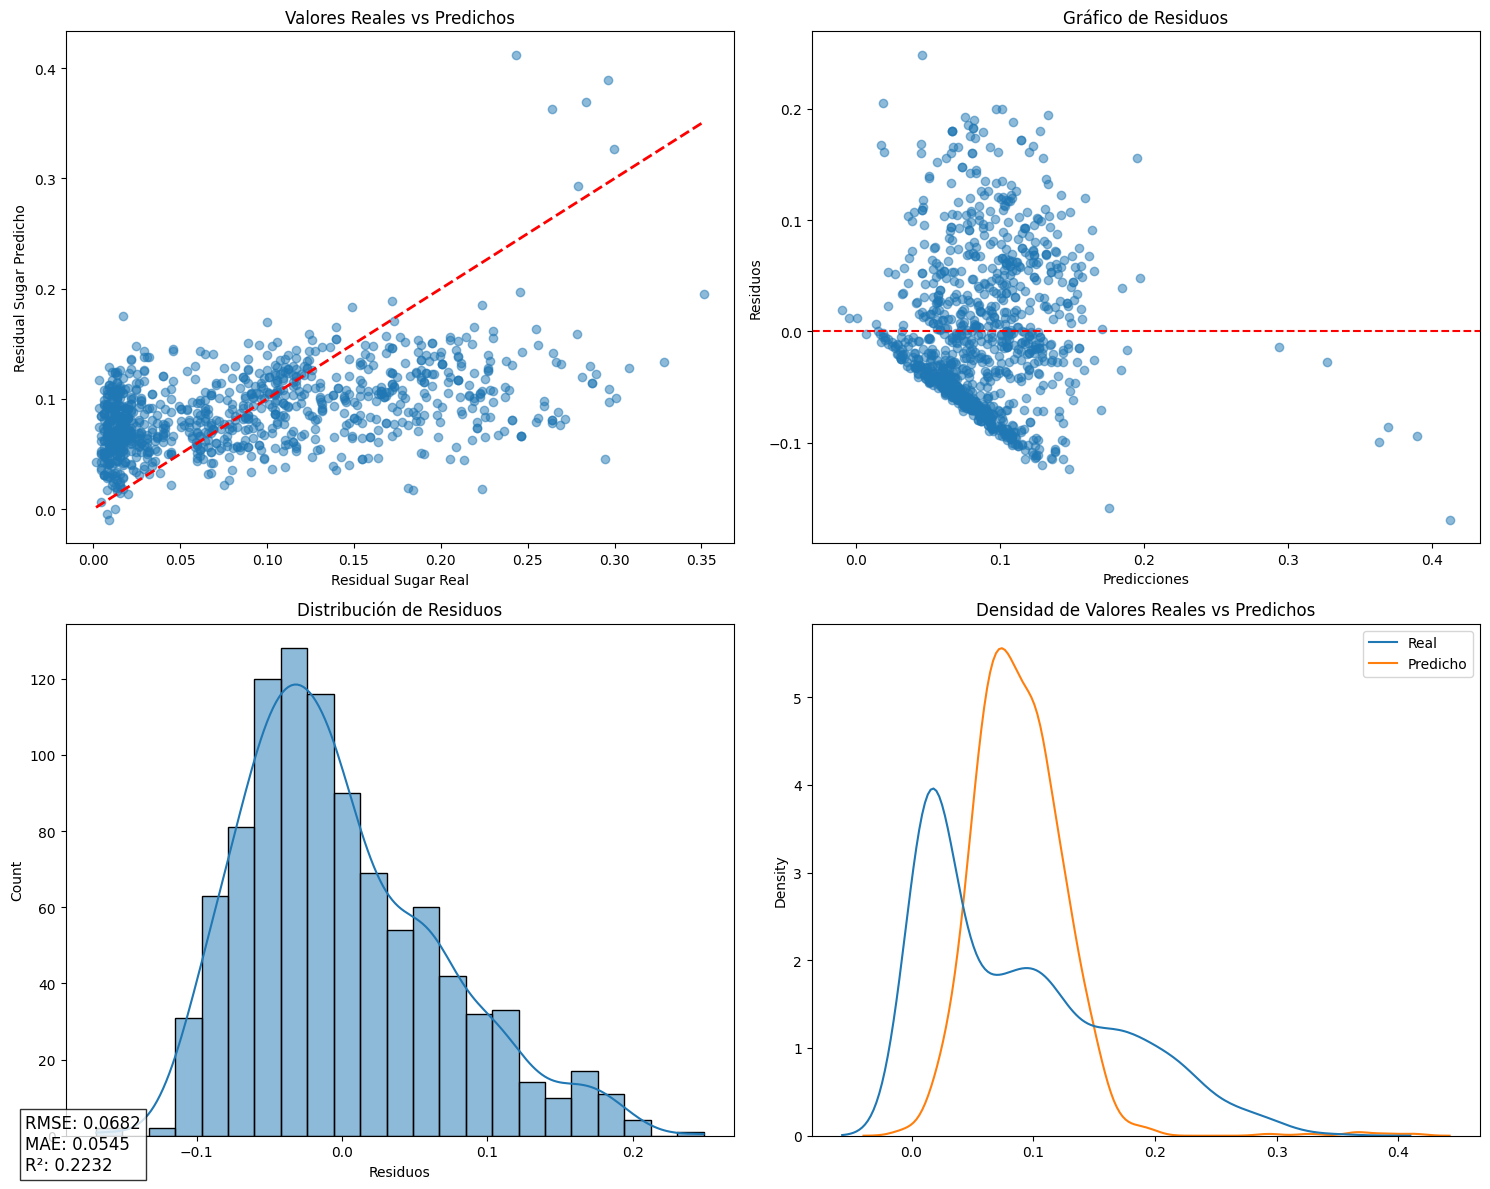

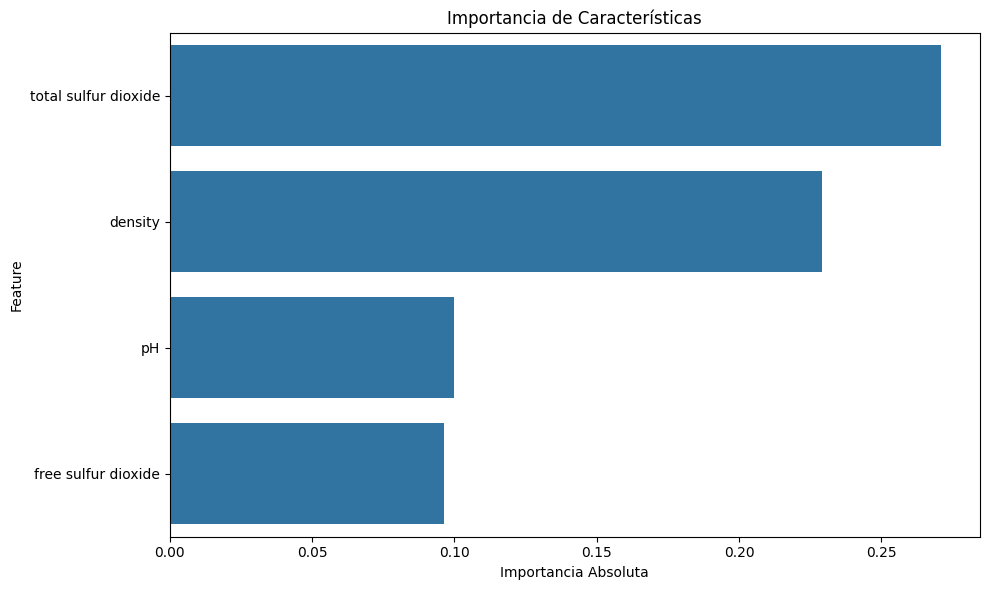


Métricas de Rendimiento:
RMSE: 0.0682
MAE: 0.0545
R²: 0.2232


In [36]:
##Grafica del modelo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def plot_model_performance(model, X_test, y_test):
    # Obtener predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Crear figura con subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Gráfico de dispersión: Valores reales vs predichos
    ax1.scatter(y_test, y_pred, alpha=0.5)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax1.set_xlabel('Residual Sugar Real')
    ax1.set_ylabel('Residual Sugar Predicho')
    ax1.set_title('Valores Reales vs Predichos')

    # 2. Gráfico de residuos
    residuals = y_test - y_pred
    ax2.scatter(y_pred, residuals, alpha=0.5)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_xlabel('Predicciones')
    ax2.set_ylabel('Residuos')
    ax2.set_title('Gráfico de Residuos')

    # 3. Histograma de residuos
    sns.histplot(residuals, kde=True, ax=ax3)
    ax3.set_title('Distribución de Residuos')
    ax3.set_xlabel('Residuos')

    # 4. Gráfico de densidad de predicciones vs reales
    sns.kdeplot(data=pd.DataFrame({
        'Real': y_test,
        'Predicho': y_pred
    }), ax=ax4)
    ax4.set_title('Densidad de Valores Reales vs Predichos')

    # Añadir métricas como texto
    plt.figtext(0.02, 0.02, f'RMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}',
                fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Imprimir importancia de características
    try:
        feature_importance = pd.DataFrame({
            'Feature': X_test.columns,
            'Importance': abs(model.coef_)
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance, x='Importance', y='Feature')
        plt.title('Importancia de Características')
        plt.xlabel('Importancia Absoluta')
        plt.tight_layout()
        plt.show()

    except:
        print("El modelo no soporta visualización directa de importancia de características")

    # Imprimir métricas
    print("\nMétricas de Rendimiento:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

# Uso de la función
plot_model_performance(modelotres, X_test, y_test)

### **Paso 14: Conocer las mejores características para el modelo seleccionado** 🍷

Analizando el gráfico de importancia de características para el modelo de predicción de azúcar residual en vinos, se observa que el dióxido de azufre total es la variable más influyente, seguida muy de cerca por la densidad del vino, mientras que el pH y el dióxido de azufre libre tienen una importancia significativamente menor, aproximadamente un tercio del impacto de las dos variables principales, lo que sugiere que el modelo basa sus predicciones principalmente en los niveles de SO2 total y la densidad del vino.

### **Paso 15: Responder la pregunta de investigación y Concluir el ejercicio** 🍷

Predicción vs Valores Reales (Gráfico superior izquierdo):
1. Existe una correlación positiva entre los valores predichos y reales
2. Hay cierta dispersión alrededor de la línea de referencia (línea roja punteada)
3. El modelo tiende a predecir mejor en valores bajos de azúcar residual (0.00-0.15)
4. Se observa mayor dispersión en valores más altos (>0.20)

Gráfico de Residuos (Superior derecho):
1. Los residuos muestran un patrón de forma cónica
2. Hay mayor variabilidad en las predicciones conforme aumentan los valores
3. La mayoría de los residuos se concentran entre -0.1 y 0.1
4. Existe una tendencia a subestimar valores altos

Distribución de Residuos (Inferior izquierdo):
1. La distribución de residuos es aproximadamente normal
2. Hay un ligero sesgo positivo (cola más larga hacia la derecha)
3. El RMSE es aproximadamente 0.0682, lo que indica un error moderado
4. La mayoría de los errores se concentran cerca de cero

Densidad de Valores (Inferior derecho):
1. Hay una discrepancia entre las distribuciones de valores reales y predichos
2. El modelo tiende a generar predicciones más concentradas (distribución naranja más estrecha)
3. Los valores reales muestran una distribución más dispersa y multimodal
4. El modelo parece simplificar la complejidad de los datos reales

Recomendaciones:

1. El modelo podría mejorarse para manejar mejor los valores extremos
2. Considerar técnicas de regularización o modelos no lineales para capturar mejor la variabilidad
3. Investigar las razones de la subestimación en valores altos
4. Evaluar si se necesitan más características o transformaciones de variables

### **Paso 16: Definir una Columna para Clasificación** 🍷

In [37]:
vino['quality'].describe()

,quality
count,4898.000000
mean,5.877884
std,0.885637
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [38]:
vino['evaluation'] = np.where(vino['quality']<6, 'Malo', 'Bueno')
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,evaluation
0,4.5,0.19,0.21,0.95,0.033,89.0,159.0,0.99332,3.34,0.42,8.0,5.0,Malo
1,6.2,0.12,0.34,1.50,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6.0,Bueno
2,6.2,0.27,0.43,7.80,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6.0,Bueno
3,6.7,0.54,0.28,5.40,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5.0,Malo
4,6.1,0.27,0.43,7.50,0.049,65.0,243.0,0.99570,3.12,0.47,9.0,5.0,Malo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6.0,Bueno
4894,6.3,0.32,0.26,12.30,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,5.0,Malo
4895,5.9,0.22,0.18,6.40,0.041,28.0,120.0,0.99403,3.27,0.50,9.9,5.0,Malo
4896,6.4,0.15,0.25,7.80,0.050,13.0,68.0,0.99394,3.16,0.40,9.9,6.0,Bueno


In [39]:
##Eliminar la columna quality
vinodos = vino.drop('quality', axis=1)
vinodos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,evaluation
0,4.5,0.19,0.21,0.95,0.033,89.0,159.0,0.99332,3.34,0.42,8.0,Malo
1,6.2,0.12,0.34,1.50,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,Bueno
2,6.2,0.27,0.43,7.80,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,Bueno
3,6.7,0.54,0.28,5.40,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,Malo
4,6.1,0.27,0.43,7.50,0.049,65.0,243.0,0.99570,3.12,0.47,9.0,Malo
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Bueno
4894,6.3,0.32,0.26,12.30,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,Malo
4895,5.9,0.22,0.18,6.40,0.041,28.0,120.0,0.99403,3.27,0.50,9.9,Malo
4896,6.4,0.15,0.25,7.80,0.050,13.0,68.0,0.99394,3.16,0.40,9.9,Bueno


In [40]:
##Definir variables X = independientes Y= predecir = evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = vinodos.drop('evaluation', axis=1)
y = vinodos['evaluation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

reglog1 = LogisticRegression(solver='liblinear', random_state=42)

reglog1.fit(X_train, y_train)

y_pred_test = reglog1.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       Bueno       0.69      0.93      0.79       486
        Malo       0.54      0.17      0.26       249

    accuracy                           0.67       735
   macro avg       0.62      0.55      0.53       735
weighted avg       0.64      0.67      0.61       735



In [41]:
vino['evaluation'].value_counts()

,count
evaluation,
Bueno,3257
Malo,1641


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Matriz de confusión\n\n', cm)

print('True Positives (TP)=', cm[0,0])
print('True Negatives (TN)=', cm[1,1])
print('False Positives (FP)=', cm[0,1])
print('False Negatives (FN)=', cm[1,0])

Matriz de confusión

 [[450  36]
 [206  43]]
True Positives (TP)= 450
True Negatives (TN)= 43
False Positives (FP)= 36
False Negatives (FN)= 206


<Axes: >

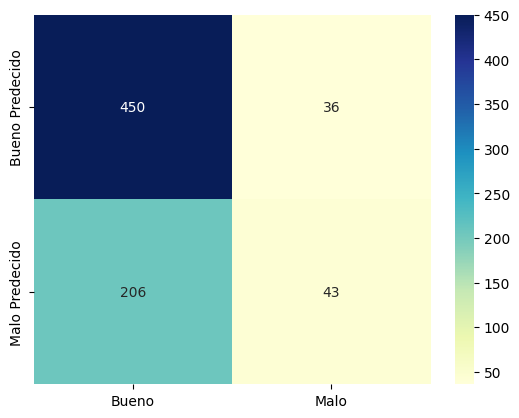

In [43]:
cm_matrix = pd.DataFrame(data=cm, columns=['Bueno','Malo'],
                         index=['Bueno Predecido','Malo Predecido'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')